# <center>Notebook #5</center>
<center>Name: NamChi Nguyen</center>
<center>Student ID: 7236760</center>

# Neural networks
### Multi-layer perceptron

CSI4106 Artificial Intelligence  
Fall 2018  
Caroline Barrière

***

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission in hospital, provided a certain set of features describing their physical state, as well as the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered.  The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of two packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, and (2) **pandas**, a must-have for data science.  Make sure you have the LATEST version of scikit-learn (version 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 5th notebook this semester, some instructions will be a bit less explicit.

***

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time. Look for (**TO DO**) for the tasks that you need to perform.  
Make sure you *sign* (type your name) the notebook at the end. Once you're done, submit your notebook.

***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes/home).  The content of this site is also copied in the file Diabetes-DatasetDescription.ipynb, so you can have it locally.  

Download the dataset (file dataset_diabetes.zip) from the UCI archive:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments.


**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file.  It will create a data structure called a dataframe, which will contain all the data. 

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* at the command prompt to have access to these packages.

In [1]:
# import the required packages for data analysis and machine learning

import pandas as pd
import sklearn

The following code reads the csv file (which I've put under a repertory called *Diabetes*, but you should adjust the path to where you've put it).  And then, it shows the top rows.

In [2]:
# Read the dataset, show top rows

X = pd.read_csv("diabetic_data.csv") #Path adjusted, no subdirectory Diabetes needed
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
# Examples of data exploration

print(X.shape) 
print(X['race'].value_counts()) 

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO-DO - Q1)** Inspired by the little piece of code above, write code to answer the following questions.  You can do part of the process manually (the code needs to help you answer).

1. How many examples are in the dataset ?
2. How many features are in the dataset ? 
3. What are the possible age ranges, and the number of examples in each ?
4. What are the prior probabilities of each class (>30, NO, <30) ?
5. Are there some patient present in the dataset more than 20 times?

In [5]:
### YOUR CODE -- Write which question it answers
# 1. How many examples are in the dataset ? (rows)
print("1.", X.shape[0], "examples")

# 2. How many features are in the dataset ? (cols)
print("2.", X.shape[1] - 1, "features") # - 1 to exclude the readmitted column

print()
# 3. What are the possible age ranges, and the number of examples in each ?
print("3. Age ranges")
print(X['age'].value_counts())
print()

# 4. What are the prior probabilities of each class (>30, NO, <30) ?
print("4. Prior probabilities")
print(X['readmitted'].value_counts())

print()
denominator = X.shape[0]
p_none = X['readmitted'].value_counts()[0]
pg_30 = X['readmitted'].value_counts()[1]
pl_30 = X['readmitted'].value_counts()[2]
print("P(>30) = ",pg_30,"/", denominator, "=", pg_30/denominator)
print("P(NO) = ", p_none, "/", denominator, "=", p_none/denominator)
print("P(<30) = ", pl_30, "/", denominator, "=", pl_30/denominator)

print()
# 5. Are there some patient present in the dataset more than 20 times?
print("5. Yes, there are 8 patients that are present in the dataset more than 20 times.\n")
present = X['patient_nbr'].value_counts()
print(present.head(10))
print()
num_times = X['patient_nbr'].value_counts() > 20
print(num_times.head(10))

#References for Q5:
# cmdline, "How To Filter Pandas Dataframe By Values of Column?", Feb. 22, 2018, [Online]. Available: https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/. [Accessed: Nov. 7, 2018]

1. 101766 examples
2. 49 features

3. Age ranges
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

4. Prior probabilities
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

P(>30) =  35545 / 101766 = 0.3492816854352141
P(NO) =  54864 / 101766 = 0.5391191557101586
P(<30) =  11357 / 101766 = 0.11159915885462728

5. Yes, there are 8 patients that are present in the dataset more than 20 times.

88785891    40
43140906    28
23199021    23
1660293     23
88227540    23
23643405    22
84428613    22
92709351    21
23398488    20
90609804    20
Name: patient_nbr, dtype: int64

88785891     True
43140906     True
23199021     True
1660293      True
88227540     True
23643405     True
84428613     True
92709351     True
23398488    False
90609804    False
Name: patient_nbr, dtype: bool


**3.  Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [6]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [7]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


**4. Input encoding**

We saw in class that any multi-value feature must be encoded into a one-hot vector.  The code below allows this encoding.

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# since the dataset is quite large, try a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# perform the one-hot encoder on the 3 features selected
ohe.fit(X_train_sf)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [9]:
# The one-hot-encoder renames the features

feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [10]:
# We can now encode the training and test set with the new features

X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO-DO - Q2)** - How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [11]:
# We can see the shape of the training data
print("Shape:", X_train_sf_encoded.shape)
print(X_train_sf_encoded.shape[1], "features after one-hot encoding")
print("There are many features because the values of the features are binarized and also become features.")
print("For example, taking the feature Gender and encoding it: F - (1, 0, 0), M - (0, 1, 0), Unknown - (0, 0, 1) so now Gender becomes 3 binary features.")

#References:
#J. Brownlee, "Why One-Hot Encode Data in Machine Learning?", July 28, 2017, [Online]. Available: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/. [Accessed: Nov. 7, 2018]

Shape: (76324, 239)
239 features after one-hot encoding
There are many features because the values of the features are binarized and also become features.
For example, taking the feature Gender and encoding it: F - (1, 0, 0), M - (0, 1, 0), Unknown - (0, 0, 1) so now Gender becomes 3 binary features


**5. Train the Multi-layer Perceptron**

In [12]:
# Import the MLP model
from sklearn.neural_network import MLPClassifier
import datetime
import matplotlib.pyplot as plt

In [13]:
# Define the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

**(TO-DO - Q3)** - Explain the parameters chosen above, and explain what the "score" is (used below).  You will need to look into the documentation for MLPclassifier to understand the score.

<i>Parameters above:</i>  
solver - used in weight optimization. lbfgs is of the quasi-Newton methods that have faster and better performance on small datasets.  The other options include sgd (stochastic gradient descent) and adam. 

alpha - L2 regularization term penalty in which L2 is the prediction that minimizes the sum of square error of training examples.  

hidden_layer_sizes - the nth element that defines the number of neurons in the nth hidden layer. So, in this model, there are 2 hidden layers with 100 units each.

random_state - the seed used by a random number generator if the value is an integer, otherwise it uses the instance of RandomState from np.random.  

max_iter - the max # of iterations  

learning_rate_init - the initial learning rate, and the step size in the updating of weights.  

warm_start - when the result is true, it reuses the previous solution to fit for initialization. Else, the previous solution is removed. 

Score - returns the mean accuracy given the expected target features and test features

<b>References:</b>  
scikit-learn, "sklearn.neural_network.MLPClassifier", n.d., [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. [Accessed: Nov. 7, 2018]

StackOverflow, "Python scikit learn MLPClassifier hidden_layer_sizes", 2016, [Online]. Available:
https://stackoverflow.com/questions/35363530/python-scikit-learn-mlpclassifier-hidden-layer-sizes. [Accessed: Nov. 7, 2018]

In [14]:
# This steps trains the model
# ATTENTION - THIS CAN TAKE LONG IF YOU CHOSE MANY ITERATIONS AND/OR LARGE HIDDEN LAYERS
# Each iteration, on my machine, takes about 80 seconds.  Be patient.
scores_train = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf.fit(X_train_sf_encoded, y_train)
    score = clf.score(X_train_sf_encoded, y_train)
    scores_train.append(score)
print(scores_train)

Iteration: 1-- 2018-11-19 12:53:35.217901
Iteration: 2-- 2018-11-19 12:54:22.036995
Iteration: 3-- 2018-11-19 12:55:06.351078
Iteration: 4-- 2018-11-19 12:55:50.489955
Iteration: 5-- 2018-11-19 12:56:34.502064
Iteration: 6-- 2018-11-19 12:57:18.480359
Iteration: 7-- 2018-11-19 12:58:02.881325
Iteration: 8-- 2018-11-19 12:58:46.161164
Iteration: 9-- 2018-11-19 12:59:30.041162
[0.5735286410565484, 0.6118127980713799, 0.634636549447094, 0.6483543839421414, 0.6566086683087888, 0.661299198155233, 0.6647057282113097, 0.6683480949635763, 0.6702085844557413]


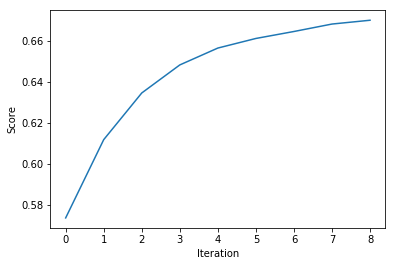

In [15]:
# plot the scores
plt.plot([i for i in range(len(scores_train))], scores_train)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

**(TO-DO : Q4)** Describe what the code below shows.

The code below shows the first 10 predicted classes based on the one-hot encoded features and the results of the training set. It outputs the predicted probability of each class (ie. >30, NO, <30) of the training set.                                                                                                                      

In [16]:
# Show the prediction on the first 10 examples
y_predicted = clf.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' '>30' 'NO' 'NO' '>30' 'NO' 'NO']
['NO' 'NO' 'NO' 'NO' '>30' '<30' '>30' '<30' 'NO' 'NO']


array([[0.10211548, 0.37839745, 0.51948708],
       [0.00430876, 0.01721095, 0.97848029],
       [0.09084075, 0.24827594, 0.66088332],
       [0.09899147, 0.36724315, 0.53376537],
       [0.27393503, 0.65938499, 0.06667998],
       [0.10068824, 0.37330446, 0.5260073 ],
       [0.10686141, 0.3952961 , 0.49784249],
       [0.14412148, 0.52570213, 0.3301764 ],
       [0.08915202, 0.33195702, 0.57889096],
       [0.00207733, 0.00842005, 0.98950262]])

**5. Test the Multi-layer Perceptron**

**(TO-DO - Q5)** Now that we've trained the model, evaluate on the test set.  What is the score?  How is it compared to the score on the training set?

In [17]:
# The test set is encoded in here: X_test_sf_encoded
scores_test = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf.fit(X_test_sf_encoded, y_test)
    score = clf.score(X_test_sf_encoded, y_test)
    scores_test.append(score)
print(scores_test)

Iteration: 1-- 2018-11-19 13:00:15.088063
Iteration: 2-- 2018-11-19 13:00:30.261388
Iteration: 3-- 2018-11-19 13:00:45.781393
Iteration: 4-- 2018-11-19 13:01:01.827951
Iteration: 5-- 2018-11-19 13:01:16.972578
Iteration: 6-- 2018-11-19 13:01:33.309847
Iteration: 7-- 2018-11-19 13:01:50.541605
Iteration: 8-- 2018-11-19 13:02:06.041590
Iteration: 9-- 2018-11-19 13:02:22.908545
[0.5413882556402798, 0.5413882556402798, 0.5413882556402798, 0.551371747504127, 0.5593506799779892, 0.5639886801352095, 0.5668186463328355, 0.5685873752063517, 0.5697665277886959]


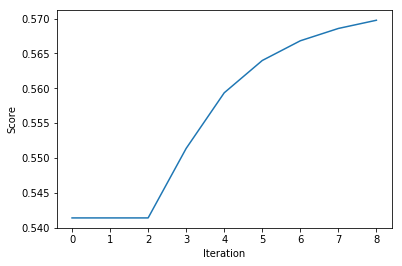

In [18]:
# plot the scores of test set
plt.plot([i for i in range(len(scores_test))], scores_test)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

Note: the scores of the test set compared to the training set are sometimes lower or higher depending on the number of times the kernel is restarted. In general, the difference between the overall score varies between approximately 0.01 to 0.10 on the last iteration.

**6. Varying hyperparameters**

There are many hyperparameters that can be varied (number of hidden layers, learning rate, etc).  It takes time to do these variations... we'll perform just two variations.

**(TO-DO - Q6)** - Redo the experiment above (train + test), changing the number and size of hidden layers to have three layers of 30 units each.  DO NOT CHANGE the code above directly, copy the part of the code needed below, using other variable names (this will allow to run the full notebook in a linear manner).  Compare the results with the first experiment, is it better? worst? Then keep the best model, and change the activation function to the sigmoid.  Better or worst?

In [19]:
# Define the model #2 with 3 hidden layers, 30 units each
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 3), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

In [20]:
# Training model #2
scores_train2 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf2.fit(X_train_sf_encoded, y_train)
    score = clf2.score(X_train_sf_encoded, y_train)
    scores_train2.append(score)
print(scores_train2)

Iteration: 1-- 2018-11-19 13:02:47.919588
Iteration: 2-- 2018-11-19 13:03:07.991440
Iteration: 3-- 2018-11-19 13:03:26.277800
Iteration: 4-- 2018-11-19 13:03:47.451288
Iteration: 5-- 2018-11-19 13:04:05.781589
Iteration: 6-- 2018-11-19 13:04:26.402459
Iteration: 7-- 2018-11-19 13:04:49.617926
Iteration: 8-- 2018-11-19 13:05:08.568005
Iteration: 9-- 2018-11-19 13:05:26.912894
[0.5512944814213091, 0.5653529689219643, 0.5735417430952257, 0.577708191394581, 0.5800927624338347, 0.5823070069702846, 0.5834599863738797, 0.5846915780095383, 0.5854121901367852]


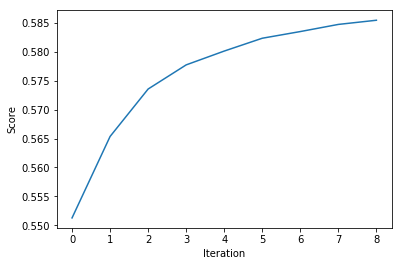

In [21]:
# plot the scores
plt.plot([i for i in range(len(scores_train2))], scores_train2)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

In [22]:
# Testing model #2
scores_test2 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf2.fit(X_test_sf_encoded, y_test)
    score = clf2.score(X_test_sf_encoded, y_test)
    scores_test2.append(score)
print(scores_test2)

Iteration: 1-- 2018-11-19 13:05:51.942770
Iteration: 2-- 2018-11-19 13:05:59.582661
Iteration: 3-- 2018-11-19 13:06:06.684557
Iteration: 4-- 2018-11-19 13:06:13.038149
Iteration: 5-- 2018-11-19 13:06:18.977799
Iteration: 6-- 2018-11-19 13:06:24.750381
Iteration: 7-- 2018-11-19 13:06:30.531207
Iteration: 8-- 2018-11-19 13:06:36.421716
Iteration: 9-- 2018-11-19 13:06:42.608165
[0.5792783586196054, 0.6097004952440845, 0.6212168854649792, 0.6275843094096376, 0.6313575976731389, 0.6346985299897807, 0.637331970757016, 0.6378036317899536, 0.6388255640279852]


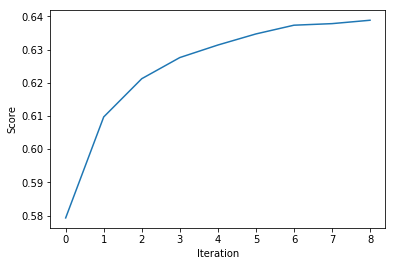

In [23]:
# plot the scores of test set
plt.plot([i for i in range(len(scores_test2))], scores_test2)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

Compared to the 1st experiment using 2 hidden layers and 100 units, the 2nd model with 3 hidden layers and 30 units is better as it resulted in higher scores overall for the test set.

In [24]:
# Define the model #3 with sigmoid activation function, 3 hidden layers, 30 units each
clf3 = MLPClassifier(activation= 'logistic', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 3), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

In [25]:
# Training model #3
scores_train3 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf3.fit(X_train_sf_encoded, y_train)
    score = clf3.score(X_train_sf_encoded, y_train)
    scores_train3.append(score)
print(scores_train3)

Iteration: 1-- 2018-11-19 13:06:49.818121
Iteration: 2-- 2018-11-19 13:07:09.886048
Iteration: 3-- 2018-11-19 13:07:30.586228
Iteration: 4-- 2018-11-19 13:07:52.902055
Iteration: 5-- 2018-11-19 13:08:13.074279
Iteration: 6-- 2018-11-19 13:08:32.704035
Iteration: 7-- 2018-11-19 13:08:52.325856
Iteration: 8-- 2018-11-19 13:09:12.554045
Iteration: 9-- 2018-11-19 13:09:33.919531
[0.5424768093915413, 0.5475997065143337, 0.5553168072952152, 0.5598501126775326, 0.5646585608720717, 0.5675148053037052, 0.5733976206697762, 0.5756773753996122, 0.5786253341019862]


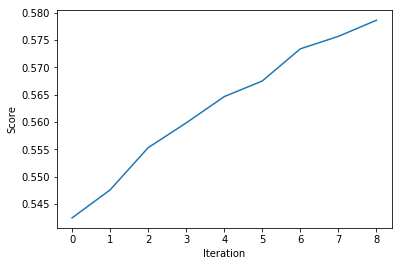

In [26]:
# plot the scores
plt.plot([i for i in range(len(scores_train3))], scores_train3)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

In [27]:
# Testing model #3
scores_test3 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf3.fit(X_test_sf_encoded, y_test)
    score = clf3.score(X_test_sf_encoded, y_test)
    scores_test3.append(score)
print(scores_test3)

Iteration: 1-- 2018-11-19 13:09:54.502292
Iteration: 2-- 2018-11-19 13:10:01.469746
Iteration: 3-- 2018-11-19 13:10:08.173651
Iteration: 4-- 2018-11-19 13:10:14.542264
Iteration: 5-- 2018-11-19 13:10:21.100567
Iteration: 6-- 2018-11-19 13:10:27.530618
Iteration: 7-- 2018-11-19 13:10:34.312322
Iteration: 8-- 2018-11-19 13:10:40.774478
Iteration: 9-- 2018-11-19 13:10:47.210769
[0.5785315619841207, 0.6011712915651285, 0.6271126483767, 0.6426774624636428, 0.6554909205251159, 0.6672038361764012, 0.6689725650499174, 0.6771873280402484, 0.6840264130178445]


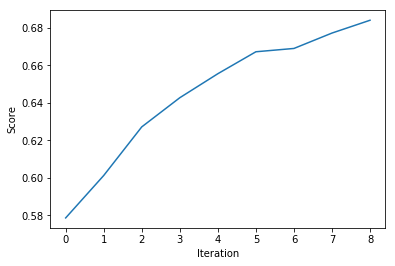

In [28]:
# plot the scores of test set
plt.plot([i for i in range(len(scores_test3))], scores_test3)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

Taking model #2 with the 3 hidden layers, 30 units and applying the sigmoid activation function for model #3 is better as it resulted in a higher score on average after 9 iterations for the test set.

**(TO_DO - Q7 - Optional)** -- Compare the results with the logistic regression classifier available in sklearn.

In [29]:
# Logistic regression
# from sklearn.linear_model import LogisticRegression
# ....

#### Signature

I, -------NamChi Nguyen--------------, declare that the answers provided in this notebook are my own.